In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [42]:
print(y.shape, tx.shape)

print(tx)
len(y)

(10000,) (10000, 2)
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


10000

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [43]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx @ w
    return (np.transpose(e) @ e) / len(y)
    
compute_loss(y, tx, np.transpose((1,2)))

5388.966731774168

# 2 Grid Search

Fill in the function `grid_search()` below:

In [60]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i,j] = compute_loss(y, tx, np.transpose((w0[i], w1[j])))
    
    result_set = sorted([
        (compute_loss(y, tx, np.transpose((i_w0, i_w1))), i_w0, i_w1)
        for i_w1 in w1
        for i_w0 in w0
    ], key=lambda a: a[0])
    
    for loss, w0, w1 in result_set[:10]:
        print("Loss: {} for w0={}, w1={}".format(loss, w0, w1))
    
    return losses

grid_search(y, tx, np.arange(60, 70, 0.33), np.arange(10, 20, 0.33))

Loss: 42.313068646229766 for w0=69.89999999999995, w1=13.63
Loss: 42.32277885332254 for w0=69.89999999999995, w1=13.3
Loss: 42.521158439137 for w0=69.89999999999995, w1=13.96
Loss: 42.55028906041531 for w0=69.89999999999995, w1=12.97
Loss: 42.94704823204423 for w0=69.89999999999995, w1=14.290000000000001
Loss: 42.995599267508084 for w0=69.89999999999995, w1=12.64
Loss: 43.590738024951456 for w0=69.89999999999995, w1=14.620000000000001
Loss: 43.65870947460084 for w0=69.89999999999995, w1=12.31
Loss: 44.45222781785869 for w0=69.89999999999995, w1=14.950000000000001
Loss: 44.539619681693615 for w0=69.89999999999995, w1=11.98


array([[219.60853657, 217.42082636, 215.45091615, 213.69880594,
        212.16449574, 210.84798553, 209.74927532, 208.86836512,
        208.20525491, 207.7599447 , 207.5324345 , 207.52272429,
        207.73081408, 208.15670387, 208.80039367, 209.66188346,
        210.74117325, 212.03826305, 213.55315284, 215.28584263,
        217.23633242, 219.40462222, 221.79071201, 224.3946018 ,
        227.2162916 , 230.25578139, 233.51307118, 236.98816097,
        240.68105077, 244.59174056, 248.72023035],
       [210.94344804, 208.75573784, 206.78582763, 205.03371742,
        203.49940722, 202.18289701, 201.0841868 , 200.20327659,
        199.54016639, 199.09485618, 198.86734597, 198.85763577,
        199.06572556, 199.49161535, 200.13530515, 200.99679494,
        202.07608473, 203.37317452, 204.88806432, 206.62075411,
        208.5712439 , 210.7395337 , 213.12562349, 215.72951328,
        218.55120307, 221.59069287, 224.84798266, 228.32307245,
        232.01596225, 235.92665204, 240.05514183],
  

In [59]:
grid_w0

array([-100.        ,  -66.66666667,  -33.33333333,    0.        ,
         33.33333333,   66.66666667,  100.        ,  133.33333333,
        166.66666667,  200.        ])

Let us play with the grid search demo now!

Loss: 84.84896629356496 for w0=66.66666666666669, w1=16.666666666666686
Loss: 754.143055042108 for w0=100.0, w1=16.666666666666686
Loss: 983.4964619595004 for w0=66.66666666666669, w1=-16.666666666666657
Loss: 1408.4236928498515 for w0=66.66666666666669, w1=50.0
Loss: 1637.777099767244 for w0=33.33333333333334, w1=16.666666666666686
Loss: 1652.7905507080459 for w0=100.0, w1=-16.666666666666657
Loss: 2077.7177815983923 for w0=100.0, w1=50.0
Loss: 2536.4245954331773 for w0=33.33333333333334, w1=-16.666666666666657
Loss: 2961.3518263235333 for w0=33.33333333333334, w1=50.0
Loss: 3645.6593660128733 for w0=133.33333333333334, w1=16.666666666666686
Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.021 seconds


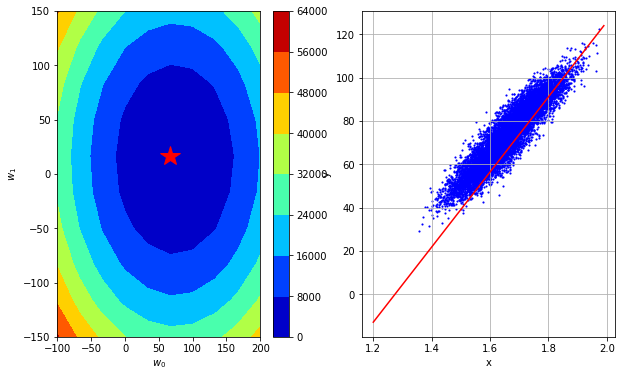

In [57]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [ ]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [ ]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [ ]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

In [ ]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [ ]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    raise NotImplementedError
    return losses, ws

In [ ]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

In [ ]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)